In [48]:
import pandas as pd
%matplotlib inline
import glob, os
from kinetics.ala_kinetics import *
from kinetics.waiting_time import *
from kinetics.sorted_lifetimes import *
import pyprind
from kinetics.check_expon import *

In [2]:
cl = sns.color_palette()

In [3]:
! ls ../dt*/md_dt*/ | tail 

md_st2md_dt5000__27jan16_blNone_pop.pickle
md_st2md_dt5000__27jan16_blNone_rates.pickle
md_st2md_dt5000__27jan16_blNone_tba.pickle
md_st2md_dt5000__27jan16_blNone_tp.pickle

../dt5000/md_dt5000_st3/:
md_st3md_dt5000__27jan16_blNone_pop.pickle
md_st3md_dt5000__27jan16_blNone_rates.pickle
md_st3md_dt5000__27jan16_blNone_tba.pickle
md_st3md_dt5000__27jan16_blNone_tp.pickle


In [4]:
dt_key_l = glob.glob("../dt*")
dt_key_l = [ k[5:] for k in dt_key_l]
dt_key_l

['1',
 '10',
 '100',
 '1000',
 '2',
 '20',
 '200',
 '25',
 '2500',
 '5',
 '50',
 '500',
 '5000']

# Lag-time dependency of lifetimes from MD

* load MD transition paths and transition-based state assignments

## Calculate lifetimes MD

In [5]:
md_dt_tp_d = {}
md_dt_state_d = {}

#for key in md_r_dt_d.keys():
for key in dt_key_l:
    #print "../dt{}/md*/*blNone_tp.pickle".format(dt)
    #dt_tp_l  = [glob.glob("../dt{}/md*/md_st{}*blNone_tp.pickle".format(dt,st))[0] for st in range(1,4)]
    _dt_tp_l = []
    _dt_st_l = []
    for st in range(1,4):
        _dt_tp_l.extend(glob.glob("../dt{}/md*_st{}/md_st{}md*_27jan16_blNone_tp.pickle".format(key,st,st)))
        _dt_st_l.extend(glob.glob("../dt{}/md*_st{}/md_st{}md*_27jan16_blNone_tba.pickle".format(key,st,st)))
        # print _dt_st_l
    md_dt_tp_d[key] = _dt_tp_l
    md_dt_state_d[key] = _dt_st_l

In [6]:
trans_from_h = [t for t in possible_transitions(4) if t[:2] == (0,0,)]
trans_from_c = [t for t in possible_transitions(4) if t[:2] == (0,1,)]

trans_from_11 =  [t for t in possible_transitions(4) if t[:2] == (1,1,)]
trans_from_10 =  [t for t in possible_transitions(4) if t[:2] == (1,0,)]

In [7]:
md_dt_hdw_d = {}
md_dt_cdw_d = {}
md_dt_11dw_d = {}
md_dt_10dw_d = {}
bar = pyprind.ProgBar(len(dt_key_l)*3)

for k, v in md_dt_tp_d.items():
    _tba = md_dt_state_d[k]
    print k
    md_h_l = []
    md_c_l = []
    md_11_l = []
    md_10_l = []
    
    for i, _tp_fn in enumerate(v):
        _st_fn = _tba[i]
        
        _tp_df = pd.read_pickle(_tp_fn)
        _st_df = pd.read_pickle(_st_fn)
        
        _tp_df0 = _tp_df[_tp_df.temperature==0]
        _st_df0 = _st_df[_st_df.temperature==0]
        
        _dw_h = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_h, tu=float(k))
        md_h_l.append(_dw_h)
        _dw_c = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_c, tu=float(k))
        md_c_l.append(_dw_c)
        
        # lifetimes in the minor states
        _dw_10 = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_10, tu=float(k))
        md_10_l.append(_dw_10)
        
        _dw_11 = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_11, tu=float(k))
        md_11_l.append(_dw_11)
        
    
    md_dt_hdw_d[k] = pd.concat(md_h_l)
    md_dt_cdw_d[k] = pd.concat(md_c_l)
    md_dt_10dw_d[k] = pd.concat(md_10_l)
    md_dt_11dw_d[k] = pd.concat(md_11_l)
    
    bar.update()

0%                          100%
[                              ]

10
5000


[#                             ] | ETA: 00:05:04

20


[##                            ] | ETA: 00:05:58

200


[###                           ] | ETA: 00:05:04

50
1


[####                          ] | ETA: 00:06:51

2


[#####                         ] | ETA: 00:07:21

5


[######                        ] | ETA: 00:07:22

25
100


[#######                       ] | ETA: 00:06:35

2500


[########                      ] | ETA: 00:05:48

500


[#########                     ] | ETA: 00:05:13

1000


## Quick comparison of MD lifetime distributions

In [8]:
_blog = np.logspace(-3,1, 5000)

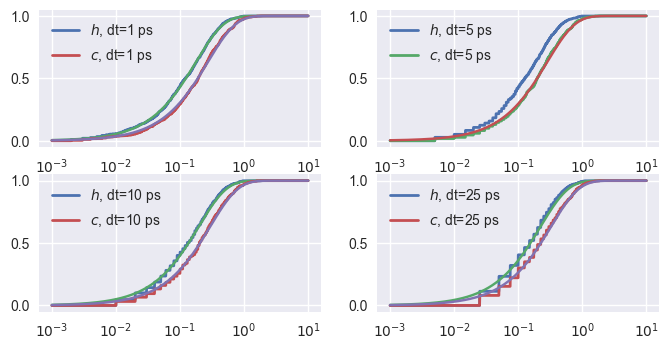

In [9]:
fig, ax = plt.subplots(2,2, figsize=(8,4))

tf = 1.0 / 1000

_ = fit_plot_cdf(ax[0,0], md_dt_hdw_d['1'].wait_T * tf, bins=_blog,
                dist_label="$h$, dt=1 ps", )
_ = fit_plot_cdf(ax[0,1], md_dt_hdw_d['5'].wait_T * tf, bins=_blog, plot_fit=False,
                dist_label="$h$, dt=5 ps")

 
_ = fit_plot_cdf(ax[1,0], md_dt_hdw_d['10'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$h$, dt=10 ps")

_ = fit_plot_cdf(ax[1,1], md_dt_hdw_d['25'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$h$, dt=25 ps")
#_ = fit_plot_cdf(ax[2,1], md_dt_hdw_d['50'].wait_T * tf, bins=_blog, plot_fit=True)


_ = fit_plot_cdf(ax[0,0], md_dt_cdw_d['1'].wait_T * tf, bins=_blog,
                dist_label="$c$, dt=1 ps")
_ = fit_plot_cdf(ax[0,1], md_dt_cdw_d['5'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$c$, dt=5 ps")
_ = fit_plot_cdf(ax[1,0], md_dt_cdw_d['10'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$c$, dt=10 ps")

_ = fit_plot_cdf(ax[1,1], md_dt_cdw_d['25'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$c$, dt=25 ps")
#_ = fit_plot_cdf(ax[2,1], md_dt_cdw_d['50'].wait_T * tf, bins=_blog, plot_fit=True)


for a in ax.flat:
    a.semilogx()
    a.legend(loc=2)

## Uncertainty in $\tau$ REMD from counts

In [10]:
md_r_dt_d = {}
for dt_fn_name in glob.glob("../dt*/c_md_dt*/rates_md_st1-3_sym_ln__27jan16.pickle"):
    dt = dt_fn_name.split("/")[1][2:]
    md_r_dt_d[dt] = pd.read_pickle(dt_fn_name)

# Lag-time dependency of lifetimes from REMD

## Calculate 

In [11]:
remd_dt_tp_l = glob.glob("../dt*/remd_dt*/*_27jan16_tp.pickle")

In [12]:
remd_dt_st_l = glob.glob("../dt*/remd_dt*/*_27jan16_tba.pickle")

In [13]:
remd_dt_tp_d = {}
remd_dt_st_d = {}

for fn in remd_dt_tp_l:
    dt = fn.split("/")[1][2:]
    #print dt
    remd_dt_tp_d[dt] = pd.read_pickle(fn)

for fn in remd_dt_st_l:
    dt = fn.split("/")[1][2:]
    remd_dt_st_d[dt] = pd.read_pickle(fn)

In [14]:
remd_dt_hdw_d = {}
remd_dt_cdw_d = {}
remd_dt_10w_d = {}
remd_dt_11dw_d = {}

bar = pyprind.ProgBar(len(remd_dt_tp_l)*4)

for k, _tp in remd_dt_tp_d.items():
    _tba = remd_dt_st_d[k]
    _tp0 = _tp[_tp.temperature==0]
    _tba0 = _tba[_tba.temperature==0]
    
    _dw_h = loop_dwell_trans_temp(_tp0,
                                  _tba0, trans_from_h, tu=float(k))
    
    _dw_c = loop_dwell_trans_temp(_tp0,
                                  _tba0, trans_from_c, tu=float(k))
    remd_dt_hdw_d[k] = _dw_h
    remd_dt_cdw_d[k] = _dw_c
    
    remd_dt_10w_d[k] = loop_dwell_trans_temp(_tp0, _tba0,
                                            trans_from_10,
                                            tu=float(k))
    remd_dt_11dw_d[k] = loop_dwell_trans_temp(_tp0, _tba0,
                                             trans_from_11,
                                             tu=float(k))
    
    bar.update()



0%                          100%
[#######                       ] | ETA: 00:03:32

## Uncertainty in $\tau$ REMD from counts

In [15]:
remd_r_dt_d = {}
for dt_fn_name in glob.glob("../dt*/remd_dt*/ala_remd_st1_dt*ps__27jan16_rates_sym_ln__27jan16.pickle"):
    dt = dt_fn_name.split("/")[1][2:]
    #print dt
    remd_r_dt_d[dt] = pd.read_pickle(dt_fn_name)

# Comparing lag-time dependences from MD and REMD

## Lagtime independent rate coefficients

assume that Ala2 is a quasi two-state system.

First fit $k$

\begin{equation}
\frac{1}{<\tau_F>_{\text{app}}} + \frac{1}{<\tau_U>_{\text{app}}} =  \frac{1 - \exp(-k t) }{ t}
\end{equation}

Then fit the relative populations.

\begin{equation}
\frac{1}{<\tau_F>_{\text{app}}} = \frac{pU' (1 - \exp(-kt)}{t} = k_{U \leftarrow F}
\end{equation}

### rate arrays

In [16]:
md_dt_cdw_d['1'].head() # wait in the coil state

,temperature,type,traj,start,stop,weight,wait_T,wait,prev_state
0,0.0,"(0.0, 1.0, 0.0, 0.0)",0.0,0.0,145.0,1.0,80.0,145.0,NaN
1,0.0,"(0.0, 1.0, 0.0, 0.0)",0.0,148.0,699.0,1.0,401.0,551.0,NaN
2,0.0,"(0.0, 1.0, 0.0, 0.0)",0.0,706.0,929.0,1.0,111.0,223.0,NaN
3,0.0,"(0.0, 1.0, 0.0, 0.0)",0.0,939.0,1068.0,1.0,39.0,129.0,NaN
4,0.0,"(0.0, 1.0, 0.0, 0.0)",0.0,1073.0,1355.0,1.0,89.0,282.0,NaN


In [17]:
md_dt_hdw_d['1'].head() # wait in the helix state

,temperature,type,traj,start,stop,weight,wait_T,wait,prev_state
0,0.0,"(0.0, 0.0, 0.0, 1.0)",0.0,0.0,63.0,1.0,63.0,63.0,NaN
1,0.0,"(0.0, 0.0, 0.0, 1.0)",0.0,68.0,295.0,1.0,149.0,227.0,NaN
2,0.0,"(0.0, 0.0, 0.0, 1.0)",0.0,301.0,816.0,1.0,114.0,515.0,NaN
3,0.0,"(0.0, 0.0, 0.0, 1.0)",0.0,821.0,1027.0,1.0,93.0,206.0,NaN
4,0.0,"(0.0, 0.0, 0.0, 1.0)",0.0,1032.0,1264.0,1.0,194.0,232.0,NaN


In [18]:
tf = 1.0 / 1000.0

In [19]:
md_lagtime_l = []
md_kc_l, md_kh_l = [], []

for dt in sorted([int(k) for k in md_dt_cdw_d.keys()]):
    md_lagtime_l.append(dt)
    _c = md_dt_cdw_d[str(dt)]
    _h = md_dt_hdw_d[str(dt)]
    md_kh_l.extend([_c[_c.temperature==0].wait_T.mean()])
    md_kc_l.extend([_h[_h.temperature==0].wait_T.mean()])    
md_kc_ar = 1.0 / (np.array(md_kc_l)*tf)
md_kh_ar = 1.0/  (np.array(md_kh_l)*tf)
md_kc_kh_ar = md_kc_ar + md_kh_ar

md_lagtime_ar = np.array(md_lagtime_l)

In [20]:
md_kc_kh_ar

array([ 9.38203042,  9.25406793,  9.04817276,  8.72595441,  8.14774794,
        7.87115053,  6.76873198,  5.07903558,  3.21880651,  1.44015157,
        0.67970888,  0.33750258,  0.16809117])

In [21]:
 1/ (md_dt_cdw_d['1'][md_dt_cdw_d['1'].temperature==0].wait_T.mean() / 1000.0)

3.7332389118955613

In [22]:
 1/ (md_dt_hdw_d['1'][md_dt_hdw_d['1'].temperature==0].wait_T.mean() / 1000.0)

5.648791509837093

In [23]:
md_r_dt_d['1'][(md_r_dt_d['1'].temperature==0) & (md_r_dt_d['1'].type==(0,1,0,0))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
36,0.0,"(0, 1, 0, 0)",3.676874,964.0,964.0,965.0,965.0,1929.0,3.761551,3.594103,0.082771,0.084677


In [24]:
remd_lagtime_l = []
remd_kc_l, remd_kh_l = [], []

for dt in sorted([int(k) for k in remd_dt_hdw_d.keys()]):
    print dt
    remd_lagtime_l.append(dt)
    _c = remd_dt_cdw_d[str(dt)]
    _h = remd_dt_hdw_d[str(dt)]
    # tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
    _c0 = _c[_c.temperature==0]
    _h0 = _h[_h.temperature==0]
    remd_kh_l.extend([np.average(_c0.wait_T / _c0.weight, weights=_c0.weight)])
    remd_kc_l.extend([np.average(_h0.wait_T / _h0.weight, weights=_h0.weight)])    
remd_kc_ar = 1.0 / (np.array(remd_kc_l)*tf)
remd_kh_ar = 1.0/  (np.array(remd_kh_l)*tf)
remd_kc_kh_ar = remd_kc_ar + remd_kh_ar

remd_lagtime_ar = np.array(remd_lagtime_l)

1
2
5
10
20
25
50
100
200
500
1000
2500
5000


In [25]:
1/ (remd_dt_hdw_d['1'][remd_dt_hdw_d['1'].temperature==0].wait_T.mean() / 1000.0)

6.813287676068768

In [26]:
1/ (remd_dt_cdw_d['1'][remd_dt_cdw_d['1'].temperature==0].wait_T.mean() / 1000.0)

4.470001829156759

In [27]:
md_kc_kh_ar

array([ 9.38203042,  9.25406793,  9.04817276,  8.72595441,  8.14774794,
        7.87115053,  6.76873198,  5.07903558,  3.21880651,  1.44015157,
        0.67970888,  0.33750258,  0.16809117])

In [28]:
remd_kc_kh_ar

array([ 9.93467867,  9.80515758,  9.4242392 ,  9.11657163,  8.39944827,
        7.99680929,  7.05139893,  5.20324584,  3.51125646,  1.32326228,
        0.57495685,  0.28231217,  0.12527778])

In [29]:
remd_lagtime_ar

array([   1,    2,    5,   10,   20,   25,   50,  100,  200,  500, 1000,
       2500, 5000])

In [30]:
popt_kex_remd = curve_fit(sum_inv_lifetimes_two_state_lagtime,
                         remd_lagtime_ar[:]*tf, remd_kc_kh_ar[:], p0=10)
kex_fit_remd = popt_kex_remd[0][0]
print popt_kex_remd

(array([ 9.44258411]), array([[ 0.04464302]]))


In [31]:
popt = curve_fit(sum_inv_lifetimes_two_state_lagtime, md_lagtime_ar[:]*tf, md_kc_kh_ar[:], p0=[10.0]) 
print popt
k_ex_fit = popt[0][0]

(array([ 9.00931758]), array([[ 0.03963532]]))


[]

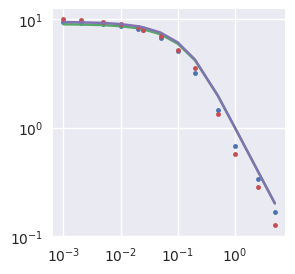

In [32]:
fig, ax = plt.subplots(figsize=(3,3))
plt.plot(md_lagtime_ar / 1000.0, md_kc_kh_ar, ".")
plt.plot(md_lagtime_ar/ 1000.0, sum_inv_lifetimes_two_state_lagtime(md_lagtime_ar*tf, k_ex_fit))

plt.plot(remd_lagtime_ar / 1000.0, remd_kc_kh_ar, ".")
plt.plot(remd_lagtime_ar/ 1000.0, sum_inv_lifetimes_two_state_lagtime(remd_lagtime_ar*tf, kex_fit_remd))

plt.loglog()

### $p'$ fit to determine lag time independent rate coefficients and populations
#### MD

In [33]:
f = lambda  t, p : inv_lifetime_two_state_lagtime(t, p, k_ex_fit)

In [34]:
popt_pc = curve_fit(f, md_lagtime_ar[:] / 1000.0, md_kc_ar[:])
print popt_pc

popt_ph = curve_fit(f, md_lagtime_ar[:]/1000.0, md_kh_ar[:])
print popt_ph

(array([ 0.59058842]), array([[ 0.00018217]]))
(array([ 0.39729415]), array([[  4.00681632e-05]]))


In [35]:
pc = popt_pc[0][0] / (popt_pc[0][0] + popt_ph[0][0])
ph = popt_ph[0][0] / (popt_pc[0][0] + popt_ph[0][0])

In [36]:
k_ex_fit * pc, k_ex_fit * ph

(5.3860638692643912, 3.6232537105041218)

In [37]:
md_r_dt_d['1'][(md_r_dt_d['1'].temperature==0) & (md_r_dt_d['1'].type.isin([(0,0,0,1), (0,1,0,0)]))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0.0,"(0, 0, 0, 1)",5.565691,965.0,965.0,964.0,964.0,1929.0,5.693867,5.440401,0.125291,0.128176
36,0.0,"(0, 1, 0, 0)",3.676874,964.0,964.0,965.0,965.0,1929.0,3.761551,3.594103,0.082771,0.084677


#### REMD

In [38]:
f_remd = lambda t, p: inv_lifetime_two_state_lagtime(t, p, kex_fit_remd)

In [39]:
popt_pc_remd = curve_fit(f, remd_lagtime_ar[:]*tf, remd_kc_ar[:])
print popt_pc_remd
popt_ph_remd = curve_fit(f, remd_lagtime_ar[:]*tf, remd_kh_ar[:])
print popt_ph_remd
pc_remd = popt_pc_remd[0][0] / (popt_pc_remd[0][0] + popt_ph_remd[0][0])
ph_remd = popt_ph_remd[0][0] / (popt_pc_remd[0][0] + popt_ph_remd[0][0])
print pc_remd, ph_remd

(array([ 0.61844082]), array([[ 0.00022834]]))
(array([ 0.41136535]), array([[  6.47087531e-05]]))
0.600540993681 0.399459006319


In [40]:
kex_fit_remd * pc, kex_fit_remd * ph

(5.6450847289329289, 3.7974993774089545)

## Load minor state lag-time dependences expected for ideal rate kinetics

In [41]:
syn_ar = np.genfromtxt("../from-syn-trj/syn_dt_ala_st3_st4_c.txt")

## Comparison plot

In [72]:
! ls ../dt10/c_md_dt10/
! mkdir -p plot

pt_md_st1-3__27jan16.txt              rates_md_st1-3_sym_ln__27jan16.pickle
rates_md_st1-3__27jan16.txt           rep_ar_md_st1-3__27jan16.txt


* error estimates from the count statistics

In [43]:
remd_r_dt_d['1'][(remd_r_dt_d['1'].type.isin(trans_from_10))].head()

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
72,0.0,"(1, 0, 0, 0)",0.148457,1.0,1.0,0.0,0.0,1.0,0.403548,0.054614,0.093843,0.255091
73,1.0,"(1, 0, 0, 0)",0.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
74,2.0,"(1, 0, 0, 0)",0.270858,2.0,2.0,0.0,0.0,2.0,0.549331,0.133551,0.137306,0.278473
75,3.0,"(1, 0, 0, 0)",0.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
76,4.0,"(1, 0, 0, 0)",0.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN


In [44]:
def _count_err_from_rate_calc(tau, r_df, trans):
    md_r = r_df[(r_df.type.isin(trans))]
    _sum = md_r.rate.sum()
    if _sum > 0:
        _N = md_r.sym_weight.sum()
    return tau*np.exp(1/_N**0.5), tau*np.exp(-1/_N**0.5)  


def _count_err_at_temp(r_df, trans, temp):
    p, m = _count_err_from_rate_calc(r_df[r_df.temperature==temp], trans)
    return m, p

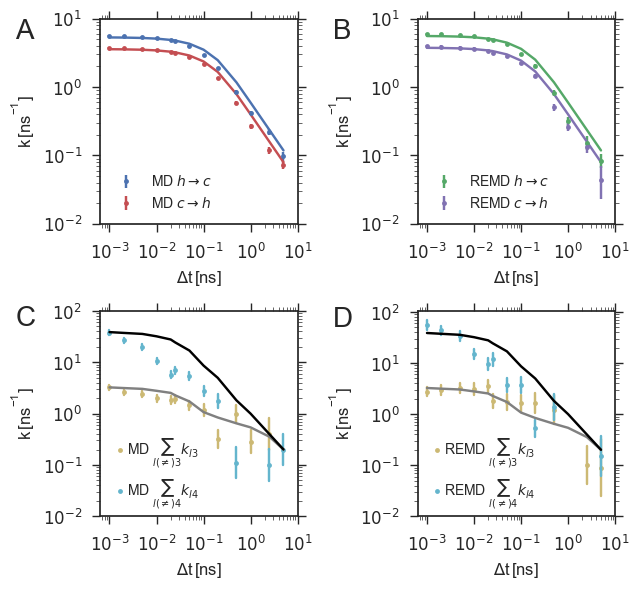

In [73]:
fig, ax = plt.subplots(2,2, figsize=(6.5,6))
sns.set_style("ticks")

for k, v in remd_dt_hdw_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
    lg1_remd = ax[0,1].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[1], fmt=".",
                                 label=r"$h \rightarrow c$")
    
for k, v in remd_dt_cdw_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
    #lg2_remd, = ax[0,1].plot(int(k)*tf, 1.0 / tau_av*1000.0 , "s", c=cl[3])   
    lg2_remd = ax[0,1].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[3], fmt=".",
                                 label=r"$c \rightarrow h$")
        
for k, v in remd_dt_10w_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_10)
        ax[1,1].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[4] )
        lg3_remd, = ax[1,1].plot(int(k)*tf, 1.0/ tau_av * 1000.0 , ".", c=cl[4], mec=cl[4]) #  mew=1.0, mfc="None"
    
for k, v in remd_dt_11dw_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_11))]
    if np.any(v.wait_T.values > 0) and md_r.rate.sum() > 0 :

        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_11)
        ax[1,1].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[5] )
        lg4_remd, = ax[1,1].plot(int(k)*tf, 1.0/ tau_av * 1000.0 , ".", c=cl[5], mec=cl[5]) #  mew=1.0, mfc="None"  
        
# mfpt h
ax[0,1].plot(remd_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
    remd_lagtime_ar*tf, popt_ph[0][0], kex_fit_remd),
          c=cl[3])
# mfpt c
ax[0,1].plot(remd_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
    remd_lagtime_ar*tf, popt_pc[0][0], kex_fit_remd),
          c=cl[1])
    
    
for k, v in md_dt_hdw_d.items():
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
  
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)
        lg1_md = ax[0,0].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[0], fmt=".",
                                 label=r"$h \rightarrow c$")
        

    
for k, v in md_dt_cdw_d.items():
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)
        #lg2_md, = ax[0,0].plot(int(k)*tf, 1.0/tau_av*1000.0, "o", c=cl[2])
        lg2_md = ax[0,0].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[2], fmt=".",
                                 label=r"$c \rightarrow h$")
        
ax[0,0].legend([lg1_md, lg2_md], [r"MD $h \rightarrow c$",
                               r"MD $c \rightarrow h$"],
            loc=3)
        
ax[0,1].legend([lg1_remd, lg2_remd], [r"REMD $h \rightarrow c$",
                               r"REMD $c \rightarrow h$"], loc=3)       
    
for k, v in md_dt_10dw_d.items():
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_10)
        ax[1,0].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[4] )
        #tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)  
        lg3_md, = ax[1,0].plot(int(k)*tf, 1.0/tau_av*1000.0, ".", c=cl[4],  mfc=cl[4], mec=cl[4])
        



for k, v in md_dt_11dw_d.items():
    
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_11))]
    
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_11)
        ax[1,0].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[5] )
        #tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)
        lg4_md, = ax[1,0].plot(int(k)*tf,  1.0/tau_av*1000.0, ".", c=cl[5],  mfc=cl[5], mec=cl[5])

        
ax[1,0].legend([lg3_md, lg4_md], [r'MD $\sum_{l(\neq)3}k_{l3}$',
                           r'MD $\sum_{l(\neq)4}k_{l4}$'],
               loc=3, handletextpad=-0.5,handleheight=0.5,
              borderaxespad=0.01)

#mfpt h
ax[0,0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_ph[0][0], k_ex_fit), "-",
          c=cl[2])
#mfpt c
ax[0,0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_pc[0][0], k_ex_fit),
          c=cl[0])       
        
ax[1,1].legend([lg3_remd, lg4_remd], [r'REMD $\sum_{l(\neq)3}k_{l3}$',
                           r'REMD $\sum_{l(\neq)4}k_{l4}$'],
               loc=3, handletextpad=-0.5,handleheight=0.5,
              borderaxespad=0.01)
            
    

for a in ax.flat:
    a.loglog()
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.set_xlim(10**-3.2, 10**1)
    a.tick_params(axis='both', which='major', labelsize=12)
    a.tick_params(axis='both', which='both', top=True , right=True)
    

    
for i, a in enumerate(["A", "B"]):
    ax.flat[i].text(10**-5, 10**0.7, a, fontsize=20)
    ax.flat[i].set_ylabel(r"$\mathregular{k \, [ns^{-1}]}$", fontsize=12)

    
for i, a in enumerate(["C", "D"]):
    ax.flat[i+2].text(10**-5, 10**1.7, a, fontsize=20)
    ax.flat[i+2].set_ylabel(r"$\mathregular{k \, [ns^{-1}]}$", fontsize=12)
    
    
ax[1,0].plot(syn_ar[:,0], syn_ar[:,1], c='grey')
ax[1,0].plot(syn_ar[:,0], syn_ar[:,2], c='black')    
ax[1,1].plot(syn_ar[:,0], syn_ar[:,1], c='grey')
ax[1,1].plot(syn_ar[:,0], syn_ar[:,2], c='black')

for a in ax[0,:]:
    a.set_yticks([10**-2, 10**-1, 10**0, 10**1])
    a.set_xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1])
    
for a in ax[1,:]:
    a.set_yticks([10**-2, 10**-1, 10**0, 10**1, 10**2])
    a.set_xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1])
    
fig.tight_layout()

fig.savefig("plot/ala_dt-rate.png")
fig.savefig("plot/ala_dt-rate.pdf")

# Lag-time dependence of $\mathrm{var}(\tau)$

In [74]:
var_mcmc_h = np.genfromtxt("../from-syn-trj/var_dt/var_lifetimes_h_ns.txt")
var_mcmc_c = np.genfromtxt("../from-syn-trj/var_dt/var_lifetimes_c_ns.txt")
var_mcmc_st3 = np.genfromtxt("../from-syn-trj/var_dt/var_lifetimes_st3_ns.txt")
var_mcmc_st4 = np.genfromtxt("../from-syn-trj/var_dt/var_lifetimes_st4_ns.txt")

In [75]:
fig_l = ["A", "B", "C", "D"]

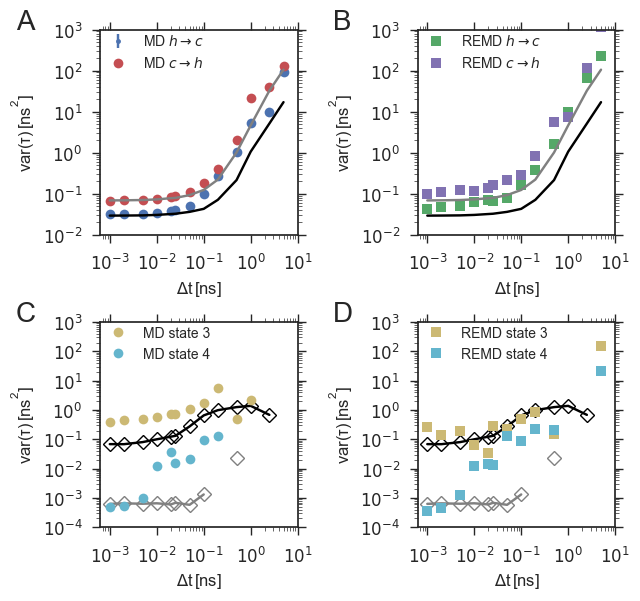

In [76]:
fig, ax = plt.subplots(2,2, figsize=(6.5,6))

for k, v in md_dt_hdw_d.items():
    _exp = check_moments_w(v.wait_T*tf, v.weight)
    lg_md, = ax[0,0].plot(int(k)*tf,  _exp[1] , "o", c=cl[0])
    
for k, v in md_dt_cdw_d.items():
    _exp = check_moments_w(v.wait_T*tf, v.weight)
    lg2_md, = ax[0,0].plot(int(k)*tf,  _exp[1] , "o", c=cl[2], label="$c \rightarrow h$")

for k, v in md_dt_10dw_d.items():  
    if np.any(v.wait_T > 0) :
        _exp = check_moments_w(v.wait_T*tf , v.weight)
        lg3_md, = ax[1,0].plot(int(k)*tf, _exp[1], "o", c=cl[4])
        

for k, v in md_dt_11dw_d.items():  
    if np.any(v.wait_T > 0) :
        _exp = check_moments_w(v.wait_T*tf , v.weight)
        lg4_md, = ax[1,0].plot(int(k)*tf, _exp[1], "o", c=cl[5])

# exclude empty arrays    
    
for k, v in remd_dt_hdw_d.items():
    _exp = check_moments_w( v.wait_T*tf, v.weight)
    lg1_remd, = ax[0,1].plot(int(k)*tf,  _exp[1] , "s", c=cl[1])   
    
for k, v in remd_dt_cdw_d.items():
    _exp = check_moments_w(v.wait_T*tf , v.weight)
    lg2_remd, = ax[0,1].plot(int(k)*tf, _exp[1] , "s", c=cl[3], label="$c \rightarrow h$")   
    
for k, v in remd_dt_10w_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        _exp = check_moments_w(v.wait_T*tf , v.weight)
        lg3_remd, = ax[1,1].plot(int(k)*tf, _exp[1], "s", c=cl[4])
        
for k, v in remd_dt_11dw_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_11))]
    
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        _exp = check_moments_w(v.wait_T*tf , v.weight)
        lg4_remd, = ax[1,1].plot(int(k)*tf, _exp[1], "s", c=cl[5])
        

for a in ax[0,:]:
    a.plot(var_mcmc_h[:,0]/1000.0, var_mcmc_h[:,2], c="k")
    a.plot(var_mcmc_c[:,0]/1000.0, var_mcmc_c[:,2], c="grey")
    a.set_ylim(10**-2, 10**3)
    
for a in ax[1,:]:
    a.plot(var_mcmc_st3[:,0]/1000.0, var_mcmc_st3[:,2], "-D", c='k',
           mfc="None", mec='k', mew=1.0, zorder=1)
    a.plot(var_mcmc_st4[:,0]/1000.0, var_mcmc_st4[:,2], "-D", c='grey',
           mfc="None", mec='grey', mew=1.0, zorder=1)
    a.set_ylim(10**-4, 10**3)
    
    
for a in ax.flat:
    a.loglog()
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.set_xlim(10**-3.2, 10**1)  
    a.tick_params(axis='both', which='major', labelsize=12)
    a.tick_params(axis='both', which='both', top=True , right=True)
    
for i, a in enumerate(fig_l):
    ax.flat[i].text(10**-5, 10**3, a, fontsize=20)
    ax.flat[i].set_ylabel(r"$\mathregular{ var(\tau) \, [ns^2]}$", fontsize=12)
    
    ax.flat[i].set_xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1])

    
ax[0,1].legend([lg1_remd, lg2_remd], [r"REMD $h \rightarrow c$",
                               r"REMD $c \rightarrow h$"], loc=2,  borderaxespad=-0.1)
ax[0,0].legend([lg1_md, lg2_md], [r"MD $h \rightarrow c$",
                               r"MD $c \rightarrow h$"], loc=2,  borderaxespad=-0.1)

ax[1,1].legend([lg3_remd, lg4_remd], [r"REMD state 3",
                               r"REMD state 4"], loc=2,  borderaxespad=-0.1)
ax[1,0].legend([lg3_md, lg4_md], [r"MD state 3",
                               r"MD state 4"], loc=2,  borderaxespad=-0.1)


fig.tight_layout()

fig.savefig("plot/ala_dt-var_tau.png")
fig.savefig("plot/ala_dt-var_tau.pdf")